In [1]:
%matplotlib inline
import pymc3 as pm
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_color_codes()
from plot_post import plot_post
import math

In [2]:
clusters = 3

n_cluster = [100, 100, 100]
n_total = sum(n_cluster)

medias = [3.14, 21, 42]
sigmas = [1, 1, 1]

mezcla = []
for cluster in range(clusters):
    datos = np.random.normal(medias[cluster], sigmas[cluster] , n_cluster[cluster])
    mezcla.extend(datos)

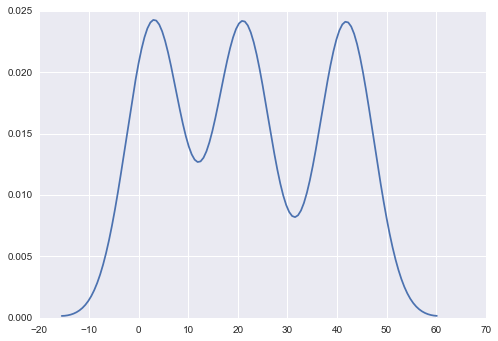

In [3]:
sns.kdeplot(np.array(mezcla));

In [4]:
with pm.Model() as model:
    # Medias de los Gaussianas
    means = pm.Normal('means', mu=[0]*clusters, sd=15, shape=clusters)
    # Desviación estándar de las Gaussianas
    sd = pm.Uniform('sd', lower=0, upper=20)

    # asignamos cada observación a un grupo con probabilidad p
    p = pm.Dirichlet('p', a=np.ones(clusters), shape=clusters)
    category = pm.Categorical('category', p=p, shape=n_total)

    # likelihood 
    points = pm.Normal('obs', mu=means[category], sd=sd, observed=mezcla)
    # muestreamos
    step1 = pm.Metropolis(vars=[p, sd, means])
    step2 = pm.ElemwiseCategoricalStep(vars=[category], values=[0, 1, 2])
    trace = pm.sample(10000, step=[step1, step2])

Applied interval-transform to sd and added transformed sd_interval to model.
Applied stickbreaking-transform to p and added transformed p_stickbreaking to model.
 [-----------------83%-----------       ] 8394 of 10000 complete in 65.0 sec**OUTPUT MUTED**

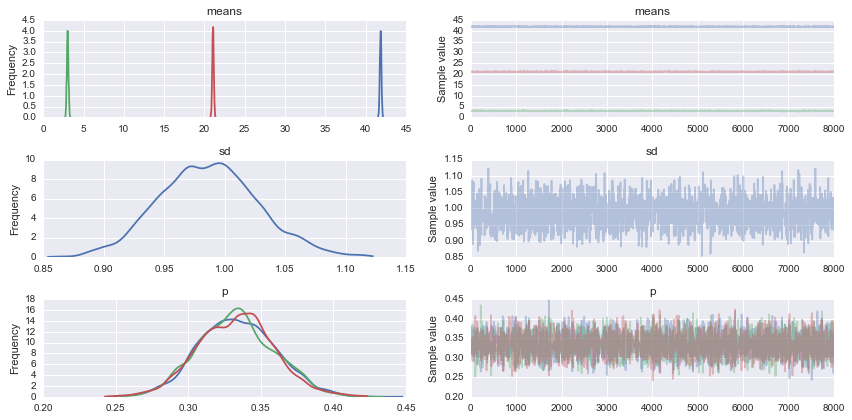

In [5]:
cadena = trace[2000::]
varnames = ['means', 'sd', 'p']
pm.plots.traceplot(cadena, varnames);